<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/sep2/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
houses=np.loadtxt("houses.txt",delimiter=',').T
Xh=houses[0:4]
th=houses[-1]
labels =["Tamaño", "# habitaciones","pisos", "Años"]

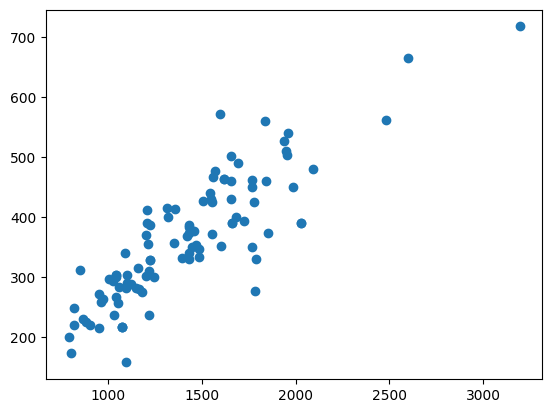

In [22]:
plt.scatter(Xh[0],th)

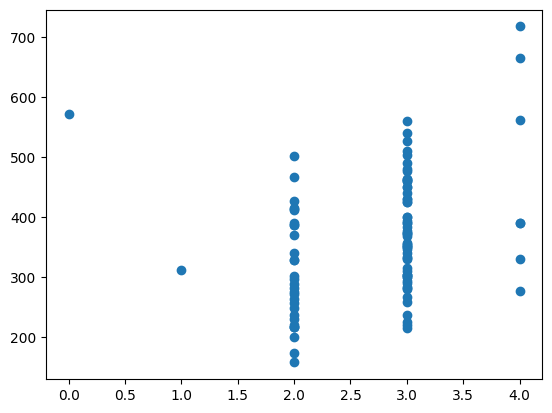

In [23]:
plt.scatter(Xh[1],th)

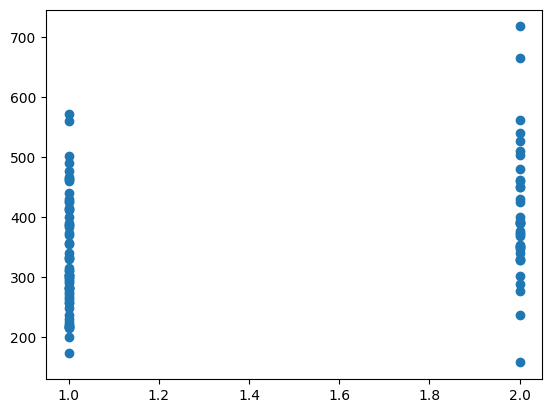

In [24]:
plt.scatter(Xh[2],th)

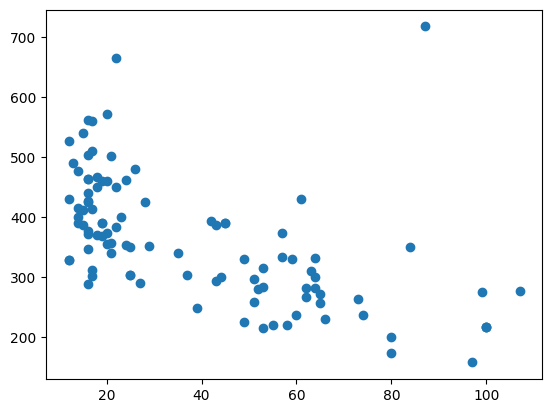

In [25]:
plt.scatter(Xh[3],th)

In [52]:
#Función costo
def L(x,y,w):
  f = w[0] + w[1]*x[0,:] + w[2]*x[1,:] + w[3]*x[2,:]+w[4]*x[3,:]
  costo= np.sum((f-y)**2)
  costo/=(2*len(x[0,:]))
  return costo

In [82]:
#derivada
def D(x,y,w):
  dw = np.zeros(len(w))
  f=0
  for i in range(len(w)):
    if i== 0:
      f = w[0]
    else:
      f += w[i]*x[i-1,:]
  for j in range(len(w)):
    if i== 0:
      dw[0] = np.sum((f-y))/len(x)
    else:
      dw[j] = np.sum((f-y)*x[j-1,:])/len(x)
  return dw

In [149]:
#método gradiente descendiente
def graddec(x,y,w,alph,iter,V,D):
  cost=[]
  for i in range(iter):
    dj=D(x,y,w)
    for j in range(len(w)):
      w[j] = w[j]-alph*dj[j]
    cost.append(V(x,y,w))
  return w, cost

In [163]:
w=[0.,0.,0.,0.,0.]
iteraciones = 200000
alph=1e-12
wf, cost=graddec(Xh,th,w, alph, iteraciones, L,D)
wf

[0.002785309039882512,
 0.2530242548421864,
 0.000432355223595086,
 0.00020059989035215906,
 0.002785309039882512]

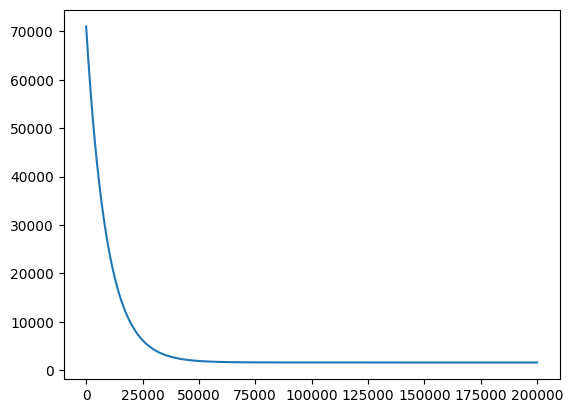

In [173]:
#Gráfica costo
plt.plot(range(iteraciones),cost)

(1500.0, 1600.0)

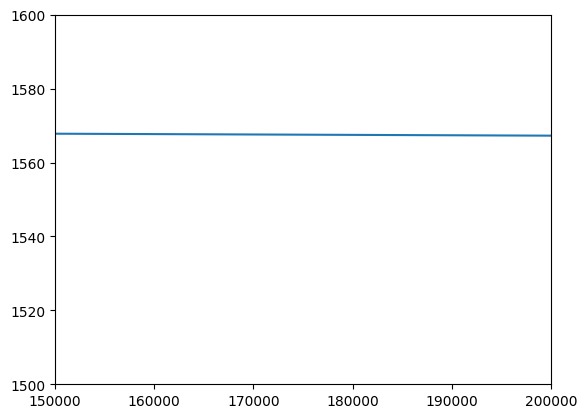

In [177]:
#Gráfica costo reducida
plt.plot(range(iteraciones),cost)
plt.xlim([150000,200000])
plt.ylim([1500,1600])

In [180]:
tPred = wf[0] + wf[1]*Xh[0,:] + wf[2]*Xh[1,:] + wf[3]*Xh[2,:]+wf[4]*Xh[3,:]

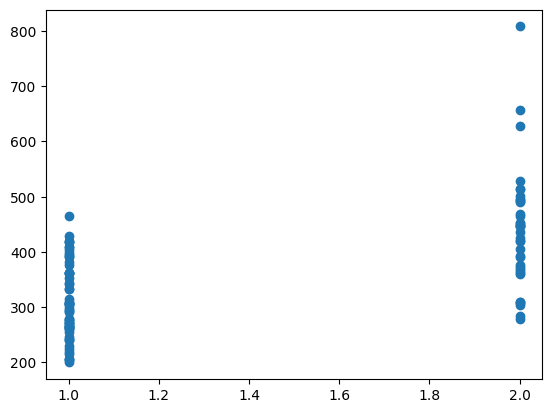

In [187]:
plt.scatter(Xh[2,:],tPred)